# CSC-583
# HW #4
# Hithesh Shanmugam

# Part I: Evaluation of language models

## Pre-processing

In [1]:
import os
import numpy as np
import nltk
import random
import matplotlib.pyplot as plt

# set the paths to the directories containing the positive and negative review folders
pos_dir = 'C:/Users/sures/OneDrive - DePaul University/Desktop/pos'
neg_dir = 'C:/Users/sures/OneDrive - DePaul University/Desktop/neg'

# function to tokenize a line of text and add start and end markers
def tokenize_line(line):
    tokens = line.strip().split() # split the line into tokens
    tokens = ['<s>'] + tokens + ['</s>'] # add start and end markers
    return tokens

# create empty lists to store the negative reviews for training and test sets
train_neg = []
test_neg = []

# iterate through the negative review folder
for label, directory in [('neg', neg_dir)]:
    for filename in os.listdir(directory):
        if filename.startswith('cv8') or filename.startswith('cv9'):
            # add file to test set
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as f:
                for line in f:
                    tokens = tokenize_line(line)
                    test_neg.append(tokens)
        else:
            # add file to training set
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as f:
                for line in f:
                    tokens = tokenize_line(line)
                    train_neg.append(tokens)

# create empty lists to store the positive reviews for training and test sets
train_pos = []
test_pos = []

# iterate through the positive review folder
for label, directory in [('pos', pos_dir)]:
    for filename in os.listdir(directory):
        if filename.startswith('cv8') or filename.startswith('cv9'):
            # add file to test set
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as f:
                for line in f:
                    tokens = tokenize_line(line)
                    test_pos.append(tokens)
        else:
            # add file to training set
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as f:
                for line in f:
                    tokens = tokenize_line(line)
                    train_pos.append(tokens)

## Creating N-grams

In [14]:
def create_ngram_model(sentences, n):
    # create a dictionary to store the n-grams and their counts
    ngrams = {}
    # iterate through the sentences
    for sentence in sentences:
        # create a list of n-grams for the sentence
        sentence_ngrams = nltk.ngrams(sentence, n)
        # iterate through the n-grams and update the counts
        for gram in sentence_ngrams:
            if gram in ngrams:
                ngrams[gram] += 1
            else:
                ngrams[gram] = 1
    # compute the total count of n-grams
    total_count = sum(ngrams.values())
    # compute the probabilities of the n-grams
    ngram_probs = {}
    for gram in ngrams:
        ngram_probs[gram] = ngrams[gram] / total_count
    return ngram_probs


# create the language models
pos_bigram_model = create_ngram_model(train_pos, 2)
neg_bigram_model = create_ngram_model(train_neg, 2)

pos_trigram_model = create_ngram_model(train_pos, 3)
neg_trigram_model = create_ngram_model(train_neg, 3)

pos_quadgram_model = create_ngram_model(train_pos, 4)
neg_quadgram_model = create_ngram_model(train_neg, 4)

## Computing Perplexity

In [15]:
# function to compute the perplexity of a test set using a language model
def compute_perplexity(test_set, ngram_probs, n):
    # initialize the log probability and count of tokens
    log_prob = 0
    count = 0
    # iterate through the sentences in the test set
    for sentence in test_set:
        # create a list of n-grams for the sentence
        sentence_ngrams = nltk.ngrams(sentence, n)
        # iterate through the n-grams and update the log probability and count
        for gram in sentence_ngrams:
            if gram in ngram_probs:
                log_prob += np.log(ngram_probs[gram])
                count += 1
            else:
                # handle n-grams not in the language model with Laplace smoothing
                log_prob += np.log(1/(len(ngram_probs)+count))
                count += 1
    # compute the perplexity
    perplexity = np.exp(-log_prob/count)
    # convert perplexity back to regular probability
    probability = 1/perplexity
    return probability

# compute the perplexity of the test sets using the language models
pos_bigram_perplexity = compute_perplexity(test_pos, pos_bigram_model, 2)
neg_bigram_perplexity = compute_perplexity(test_neg, neg_bigram_model, 2)

pos_trigram_perplexity = compute_perplexity(test_pos, pos_trigram_model, 3)
neg_trigram_perplexity = compute_perplexity(test_neg, neg_trigram_model, 3)

pos_quadgram_perplexity = compute_perplexity(test_pos, pos_quadgram_model, 4)
neg_quadgram_perplexity = compute_perplexity(test_neg, neg_quadgram_model, 4)

# print the perplexity scores
print('Positive Reviews - Bigram Perplexity:', pos_bigram_perplexity)
print('Negative Reviews - Bigram Perplexity:', neg_bigram_perplexity)

print('Positive Reviews - Trigram Perplexity:', pos_trigram_perplexity)
print('Negative Reviews - Trigram Perplexity:', neg_trigram_perplexity)

print('Positive Reviews - Quadgram Perplexity:', pos_quadgram_perplexity)
print('Negative Reviews - Quadgram Perplexity:', neg_quadgram_perplexity)

Positive Reviews - Bigram Perplexity: 2.21298196129871e-05
Negative Reviews - Bigram Perplexity: 2.3922930842984797e-05
Positive Reviews - Trigram Perplexity: 2.9848956365170453e-06
Negative Reviews - Trigram Perplexity: 3.339354425569596e-06
Positive Reviews - Quadgram Perplexity: 1.7613504675892323e-06
Negative Reviews - Quadgram Perplexity: 1.9903044028307965e-06


In [19]:
def plot_perplexity_scores(scores, title):
    labels = ['Bigram', 'Trigram', 'Quadgram']
    plt.bar(labels, scores)
    plt.title(title)
    plt.xlabel('Language Model')
    plt.ylabel('Perplexity Score')
    plt.show()

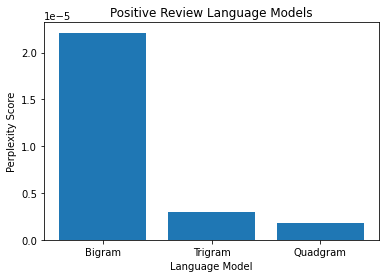

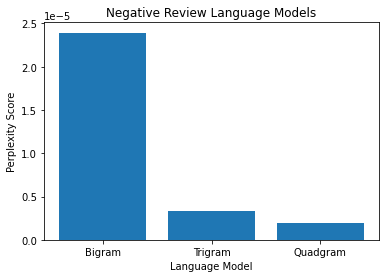

In [20]:
# plot perplexity scores for positive reviews
pos_scores = [pos_bigram_perplexity, pos_trigram_perplexity, pos_quadgram_perplexity]
plot_perplexity_scores(pos_scores, 'Positive Review Language Models')

# plot perplexity scores for negative reviews
neg_scores = [neg_bigram_perplexity, neg_trigram_perplexity, neg_quadgram_perplexity]
plot_perplexity_scores(neg_scores, 'Negative Review Language Models')

In [16]:
# Compute perplexity of positive models on positive and negative test sets
bi_pospos_perplexity = compute_perplexity(test_pos, pos_bigram_model, 2)
bi_posneg_perplexity = compute_perplexity(test_neg, pos_bigram_model, 2)

# Compute perplexity of negative models on positive and negative test sets
bi_negpos_perplexity = compute_perplexity(test_pos, neg_bigram_model, 2)
bi_negneg_perplexity = compute_perplexity(test_neg, neg_bigram_model, 2)

# Print perplexity scores
print("Positive model on positive test set:", bi_pospos_perplexity)
print("Positive model on negative test set:", bi_posneg_perplexity)
print("Negative model on positive test set:", bi_negpos_perplexity)
print("Negative model on negative test set:", bi_negneg_perplexity)

Positive model on positive test set: 2.21298196129871e-05
Positive model on negative test set: 2.201976746235992e-05
Negative model on positive test set: 2.2258315753570625e-05
Negative model on negative test set: 2.3922930842984797e-05


In [17]:
# Compute perplexity of positive models on positive and negative test sets
tri_pospos_perplexity = compute_perplexity(test_pos, pos_trigram_model, 3)
tri_posneg_perplexity = compute_perplexity(test_neg, pos_trigram_model, 3)

# Compute perplexity of negative models on positive and negative test sets
tri_negpos_perplexity = compute_perplexity(test_pos, neg_trigram_model, 3)
tri_negneg_perplexity = compute_perplexity(test_neg, neg_trigram_model, 3)

# Print perplexity scores
print("Positive model on positive test set:", tri_pospos_perplexity)
print("Positive model on negative test set:", tri_posneg_perplexity)
print("Negative model on positive test set:", tri_negpos_perplexity)
print("Negative model on negative test set:", tri_negneg_perplexity)

Positive model on positive test set: 2.9848956365170453e-06
Positive model on negative test set: 2.9890031846826135e-06
Negative model on positive test set: 3.159052631062206e-06
Negative model on negative test set: 3.339354425569596e-06


In [18]:
# Compute perplexity of positive models on positive and negative test sets
quad_pospos_perplexity = compute_perplexity(test_pos, pos_quadgram_model, 4)
quad_posneg_perplexity = compute_perplexity(test_neg, pos_quadgram_model, 4)

# Compute perplexity of negative models on positive and negative test sets
quad_negpos_perplexity = compute_perplexity(test_pos, neg_quadgram_model, 4)
quad_negneg_perplexity = compute_perplexity(test_neg, neg_quadgram_model, 4)

# Print perplexity scores
print("Positive model on positive test set:", quad_pospos_perplexity)
print("Positive model on negative test set:", quad_posneg_perplexity)
print("Negative model on positive test set:", quad_negpos_perplexity)
print("Negative model on negative test set:", quad_negneg_perplexity)

Positive model on positive test set: 1.7613504675892323e-06
Positive model on negative test set: 1.7753040631230906e-06
Negative model on positive test set: 1.924851629363735e-06
Negative model on negative test set: 1.9903044028307965e-06


# Part II: Text generation from ngram language models

In [75]:
# Merge all reviews together
all_reviews = train_pos + train_neg + test_pos + test_neg

## Bigram Model

In [84]:
# Generating model using maximum strategy
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(' '.join(word), end=' ')
        if not cfdist[tuple(word)]:
            break
        word = cfdist[tuple(word)].max().split()
        
bigrams = list(nltk.bigrams([word for review in all_reviews for word in review]))
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, ['<s>'])

<s> 

In [83]:
# Generating model using random strategy
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(' '.join(word), end=' ')
        if tuple(word) not in cfdist:
            word = [random.choice(list(cfdist.keys()))]
        else:
            word = cfdist[tuple(word)].max()
            word = word.split()

bigrams = list(nltk.bigrams([word for review in all_reviews for word in review]))
cfd = nltk.ConditionalFreqDist(bigrams)

for i in range(3):
    generate_model(cfd, ['<s>'])
    print('\n')

<s> inky drug-stoked museums deficiency maeda flatulence megalopolis dumas' develop unofficial veer 2017 willpower kwouk 

<s> comedy--it aurora snoots vexing 2-d rotating pruit loathable artisan reginald perth interwoven copy-machine statements 

<s> high-quality action/adventure subsist expressly typewriter hijack material--a feingold drop black-wannabe unfathomable swamped perspectives panhood 



## Trigram Model 

In [58]:
n = 3 # Set the value of n for the n-gram model

# Create a list of n-grams from the tokenized texts
ngrams = []
for sent in all_reviews:
    ngrams += list(nltk.ngrams(sent, n))

# Calculate the frequency distribution of the n-grams
fdist = nltk.FreqDist(ngrams)

# Calculate the conditional frequency distribution of the n-grams
cfdist = nltk.ConditionalFreqDist([(ngram[:-1], ngram[-1]) for ngram in ngrams])

In [59]:
def generate_text(cfdist, start_words, strategy='max', max_words=50):
    text = list(start_words)
    while len(text) < max_words:
        if text[-1] == '</s>':
            break
        if strategy == 'max':
            next_word = cfdist[tuple(text[-2:])].max()
        elif strategy == 'random':
            next_word = random.choice(list(cfdist[tuple(text[-2:])].keys()))
        else:
            raise ValueError("Invalid strategy: choose 'max' or 'random'.")
        text.append(next_word)
    return ' '.join(' '.join(text).split())

In [60]:
# Generating model using maximum strategy
cfdist=cfdist
start_words = ['<s>', 'i']
strategy = 'max'
max_words = 50
generated_text = generate_text(cfdist, start_words, strategy=strategy, max_words=max_words)
print(generated_text)

<s> i don't know what you did last summer , " the big screen . </s>


In [62]:
# Generating model using random strategy
cfdist=cfdist
start_words = ['<s>', 'i']
strategy = 'random'
max_words = 50
for i in range(3):
    generated_text = generate_text(cfdist, start_words, strategy=strategy, max_words=max_words)
    print(generated_text)

<s> i waited this long to maker that it very realisticaly . </s>
<s> i enjoy this picture are phrases like " strange " and followed by rather action thriller . </s>
<s> i imagine he didn't come into rescue . </s>


## Quadgram Model 

In [90]:
# Generating model using maximum strategy
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(' '.join(word), end=' ')
        if not cfdist[tuple(word)]:
            break
        word = cfdist[tuple(word)].max().split()

quadgrams = list(nltk.ngrams([word for review in all_reviews for word in review], 4))
cfd = nltk.ConditionalFreqDist([(tuple(ngram[:3]), ngram[3]) for ngram in quadgrams])

generate_model(cfd, ['<s>', 'this', 'is'])


<s> this is a 

In [91]:
# Generating model using random strategy
def generate_model(cfdist, word, num=15):
    for i in range(num):
        # Print the current word
        print(' '.join([str(w) for w in word]), end=' ')
        
        # If the current word is not in the conditional frequency distribution,
        # randomly choose a trigram that is in the distribution
        if tuple(word) not in cfdist:
            word = list(random.choice(list(cfdist.keys())))
        
        # If the current word is in the conditional frequency distribution,
        # choose the most likely next word based on the distribution
        else:
            word = list(cfdist[tuple(word)].max())
        word.pop(0)
        word.append('')

# Create quadgrams from the reviews            
quadgrams = list(nltk.ngrams([word for review in all_reviews for word in review], 4))

# Create a conditional frequency distribution of words based on the previous 3 words (i.e., the trigram)
# and the current word (i.e., the fourth word or the target word)
cfd = nltk.ConditionalFreqDist([(tuple(ngram[:3]), ngram[3]) for ngram in quadgrams])

# Generate three sentences starting with the trigram '<s> this is'
for i in range(3):
    generate_model(cfd, ['<s>', 'this', 'is'])
    print('\n')

<s> this is  mask was  mira sorvino's  least someone  reese travels  say ,  butthead ,  within the  conversation ,  said before  problem sitting  a beautiful  wound script  because the  

<s> this is  that mgm  floating into  customers .  , beautiful  with .  belongings ,  added a  hollywood mr  at the  of christine's  , in  that has  plays the  

<s> this is  they exist  predictable .  is lifted  , where  it .  since walter  released "  seeing bad  taken lightly  buddy buddy  as villains  ( leguizamo  half )  

